### Created on 2023
### @author: S.W

----

# Tensorflow

----

## CIFAR-10 데이터셋으로 이미지 분류 해보기 - MLP

### 0. CIFAR-10 데이터

CIFAR-10은 Canadian Institute For Advanced Research (CIAR)에서 만든 컴퓨터 비전용 데이터셋입니다. 이 데이터셋은 32x32 크기의 컬러 이미지를 10개의 클래스로 분류하는 문제를 다룹니다.

CIFAR-10 데이터셋은 다음과 같은 10개의 클래스로 구성되어 있습니다.

- Airplane
- Automobile
- Bird
- Cat
- Deer
- Dog
- Frog
- Horse
- Ship
- Truck

데이터셋은 50,000개의 훈련 이미지와 10,000개의 테스트 이미지로 구성되어 있습니다. 각 이미지는 RGB 채널 값으로 이루어져 있고, 픽셀 값은 0~255의 범위를 가집니다.

- https://www.cs.toronto.edu/~kriz/cifar.html

### 1. 학습에 필요한 라이브러리 불러오기

In [1]:
import numpy as np

# 시각화 관련 라이브러리 불러오기
import PIL
import matplotlib 
import matplotlib.pyplot as plt


# 딥러닝 관련 라이브러리인 tensorflow, keras 불러오기
import keras
from keras.utils import np_utils
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense

아래의 코드에서 tf.config.list_physical_devices('GPU')는 시스템에 연결된 모든 GPU 장치들의 리스트를 반환합니다. 반환값이 []이면 시스템에 GPU가 없는 것입니다.

tf.test.is_gpu_available() 함수는 TensorFlow가 GPU를 사용할 수 있는지 확인합니다. 이 함수는 True 또는 False 값을 반환합니다. GPU가 설정되어 있지 않은 경우, TensorFlow는 CPU를 사용하여 연산을 수행합니다.

In [2]:
# GPU 사용 가능 여부 확인
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# GPU가 설정되어 있는지 확인
print(tf.test.is_gpu_available())

Num GPUs Available:  0
Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
False


### 2. CIFAR-10 데이터 불러오기

In [3]:
# tensorflow에 내장되어 있는 CIFAR-10 데이터 셋 불러오기
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape, train_labels.shape, test_images.shape, test_labels.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3) (10000, 1)


### 3. 이미지 데이터 전처리

- 픽셀 값을 0과 1 사이의 값으로 변경 → 딥러닝은 학습할 때 작은 숫자에 더 잘 학습됨.

In [4]:
# CNN 학습을 위해 데이터 구조 변경
# CNN의 일반적인 데이터 input 구조 - (데이터 수, 높이, 너비, 채널)
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

### 4. 모델 정의(keras sequential API)

In [5]:
model = keras.Sequential(
    [
        keras.Input(shape=(32, 32, 3)),
        layers.Flatten(), # 다차원 데이터를 1차원 데이터로 바꿔줌.
        layers.Dense(512, activation="relu"),
        layers.Dense(256, activation="relu"),
        layers.Dense(128, activation="relu"),
        layers.Dense(10),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


### 5. 모델 학습

In [6]:
# 모델 컴파일
# model.compile() - 학습할 때 필요한 요인들을 설정한다.
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), # 손실함수 설정
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), # 최적화 방법 설정
    metrics=["accuracy"], # 모델의 평가지표 설정
)

# 모델 학습
# model.fit() - 모델을 학습시킨다.
history = model.fit(train_images, train_labels, batch_size=64, epochs=10, validation_split=0.2)

# 학습 관련 함수가 있는 keras 공식 documents - https://keras.io/api/models/model_training_apis/

Epoch 1/10


2023-04-21 17:11:12.472749: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 14s 23ms/step - loss: 1.8795 - accuracy: 0.3185 - val_loss: 1.7398 - val_accuracy: 0.3753
Epoch 2/10
625/625 [==============================] - 9s 14ms/step - loss: 1.6828 - accuracy: 0.3939 - val_loss: 1.6966 - val_accuracy: 0.3887
Epoch 3/10
625/625 [==============================] - 6s 10ms/step - loss: 1.6112 - accuracy: 0.4245 - val_loss: 1.5827 - val_accuracy: 0.4394
Epoch 4/10
625/625 [==============================] - 6s 10ms/step - loss: 1.5492 - accuracy: 0.4442 - val_loss: 1.5960 - val_accuracy: 0.4308
Epoch 5/10
625/625 [==============================] - 6s 9ms/step - loss: 1.5038 - accuracy: 0.4592 - val_loss: 1.5195 - val_accuracy: 0.4654
Epoch 6/10
625/625 [==============================] - 6s 9ms/step - loss: 1.4672 - accuracy: 0.4763 - val_loss: 1.5440 - val_accuracy: 0.4545
Epoch 7/10
625/625 [==============================] - 6s 9ms/step - loss: 1.4344 - accuracy: 0.4882 - val_loss: 1.5244 - val_accuracy: 0.4615
Epoch 8/10
6

### 6. 모델 평가(Loss, Accuracy)

In [7]:
# evaluate() : model.compile() 함수에서 사용한 metrics의 함수를 통해 test data에 대한 metric 결과 출력
model.evaluate(test_images, test_labels, batch_size=64, verbose=2)

157/157 - 0s - loss: 1.4539 - accuracy: 0.4872 - 284ms/epoch - 2ms/step


[1.4538723230361938, 0.487199991941452]

### 7. 모델 학습과정 시각화

313/313 [==============================] - 0s 1ms/step - loss: 1.4539 - accuracy: 0.4872

Accuracy: 0.4872


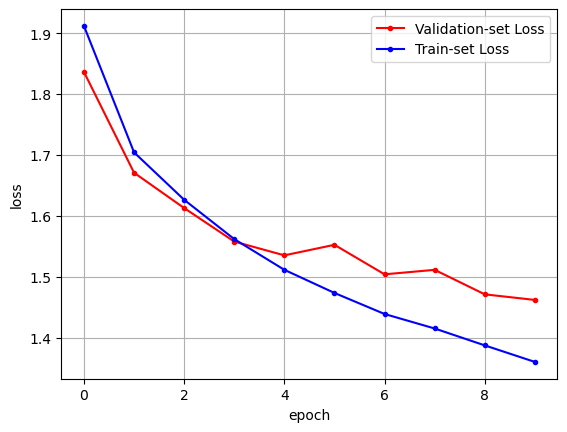

In [8]:
# 출처
# https://snowdeer.github.io/machine-learning/2018/01/10/check-relation-between-epoch-and-loss-using-graph/

print('\nAccuracy: {:.4f}'.format(model.evaluate(test_images, test_labels)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## CIFAR-10 데이터셋으로 이미지 분류 해보기 - CNN

### 1. 학습에 필요한 라이브러리 불러오기 - 생략
### 2. CIFAR-10 데이터 불러오기

In [9]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print(train_images.shape, train_labels.shape, test_images.shape)

(50000, 32, 32, 3) (50000, 1) (10000, 32, 32, 3)


### 3. 이미지 데이터 전처리

In [10]:
# CNN 학습을 위해 데이터 구조 변경
# CNN의 일반적인 데이터 input 구조 - (데이터 수, 높이, 너비, 채널)
train_images = train_images.reshape((50000, 32, 32, 3))
test_images = test_images.reshape((10000, 32, 32, 3))

# 픽셀 값을 0~1 사이로 정규화합니다.
train_images, test_images = train_images / 255.0, test_images / 255.0

### 4. 모델 정의(keras functional API)

In [11]:
# keras functional API
input_layer = Input(shape = (32, 32, 3))
cnn_1 = layers.Conv2D(32, (3,3), activation="relu", padding="same")(input_layer)
pooling_1 = layers.MaxPooling2D((2,2))(cnn_1)
cnn_2 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(pooling_1)
pooling_2 = layers.MaxPooling2D((2,2))(cnn_2)
cnn_3 = layers.Conv2D(64, (3,3), activation="relu", padding="same")(pooling_2)

flat = layers.Flatten()(cnn_3) # 고차원 데이터를 1차원 데이터로 flatten 시킴
dense_1 = layers.Dense(64, activation='relu')(flat)
output_layer= Dense(10, activation="softmax")(dense_1)

model = Model(inputs=input_layer, outputs=output_layer)

In [12]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928 

### 5. 모델 학습

In [13]:
# 모델 컴파일
# model.compile() - 학습할 때 필요한 요인들을 설정한다.
model.compile(optimizer='adam', # 최적화 방법 설정
              loss='sparse_categorical_crossentropy', # 손실함수 설정
              metrics=['accuracy', 'sparse_categorical_crossentropy'], # 평가지표 설정
             )

# 모델 학습
# model.fit() - 모델을 학습시킨다.
history = model.fit(train_images, train_labels,
                    validation_data=(test_images, test_labels),
                    batch_size = 64,
                    epochs=10)

# 학습 관련 함수가 있는 keras 공식 documents - https://keras.io/api/models/model_training_apis/

Epoch 1/10
782/782 [==============================] - 15s 18ms/step - loss: 1.4961 - accuracy: 0.4599 - sparse_categorical_crossentropy: 1.4961 - val_loss: 1.1663 - val_accuracy: 0.5872 - val_sparse_categorical_crossentropy: 1.1663
Epoch 2/10
782/782 [==============================] - 15s 20ms/step - loss: 1.0676 - accuracy: 0.6240 - sparse_categorical_crossentropy: 1.0676 - val_loss: 0.9842 - val_accuracy: 0.6530 - val_sparse_categorical_crossentropy: 0.9842
Epoch 3/10
782/782 [==============================] - 16s 20ms/step - loss: 0.8910 - accuracy: 0.6878 - sparse_categorical_crossentropy: 0.8910 - val_loss: 0.8731 - val_accuracy: 0.6975 - val_sparse_categorical_crossentropy: 0.8731
Epoch 4/10
782/782 [==============================] - 16s 21ms/step - loss: 0.7970 - accuracy: 0.7223 - sparse_categorical_crossentropy: 0.7970 - val_loss: 0.8178 - val_accuracy: 0.7125 - val_sparse_categorical_crossentropy: 0.8178
Epoch 5/10
782/782 [==============================] - 16s 21ms/step - lo

### 6. 모델 평가(Loss, Accuracy)

In [14]:
# evaluate() : model.compile() 함수에서 사용한 metrics의 함수를 통해 test data에 대한 metric 결과 출력

model.evaluate(test_images, test_labels, verbose=0)

[0.8540404438972473, 0.7337999939918518, 0.8540404438972473]

#### scikit-learn에 있는 평가지표를 통해 모델 평가하기

In [15]:
# 모델 테스트 데이터 예측값 출력
y_pred = model.predict(test_images)
y_pred[0]

array([4.0398684e-04, 4.5844790e-05, 3.8841864e-04, 8.4704238e-01,
       1.4496638e-04, 1.4963946e-01, 1.2243526e-03, 2.7654551e-05,
       9.8326034e-04, 9.9672616e-05], dtype=float32)

In [16]:
# 열 단위, 가장 높은 값을 반환
np.argmax(y_pred, axis=1)

array([3, 8, 0, ..., 5, 4, 7])

In [17]:
from sklearn.metrics import accuracy_score

accuracy_score(test_labels, np.argmax(y_pred, axis=1))

0.7338

### 7. 모델 학습과정 시각화

313/313 [==============================] - 2s 6ms/step - loss: 0.8540 - accuracy: 0.7338 - sparse_categorical_crossentropy: 0.8540

Accuracy: 0.7338


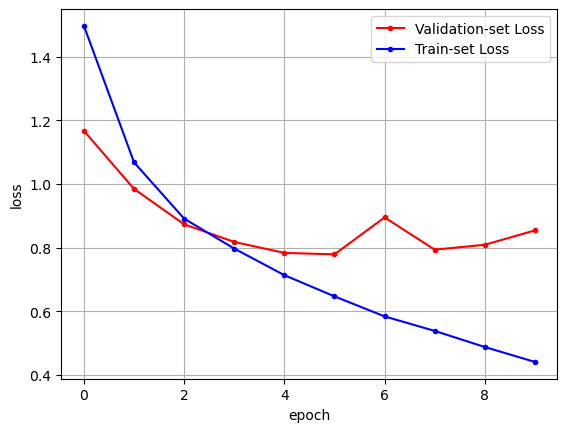

In [18]:
# 출처
# https://snowdeer.github.io/machine-learning/2018/01/10/check-relation-between-epoch-and-loss-using-graph/

print('\nAccuracy: {:.4f}'.format(model.evaluate(test_images, test_labels)[1]))

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

x_len = np.arange(len(y_loss))
plt.plot(x_len, y_vloss, marker='.', c='red', label="Validation-set Loss")
plt.plot(x_len, y_loss, marker='.', c='blue', label="Train-set Loss")

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

## 실제로 잘 맞췄는지 확인해보기

AxesImage(80,52.8;496x369.6)
실제 라벨 값:  [3] 
예측 라벨 값: 3


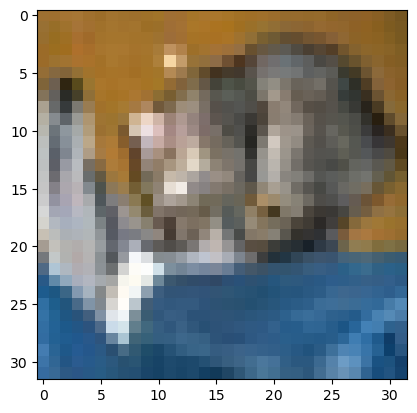

In [19]:
n = 0
print(plt.imshow(test_images[n]))
print("실제 라벨 값: ",test_labels[n], "\n예측 라벨 값:", np.argmax(y_pred[n], axis=0))# 